In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('diabetic_data.csv')
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
dataset.shape

(101766, 50)

In [3]:
dataset.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [4]:
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
dataset.replace("?", np.nan, inplace=True)

In [6]:
dataset['readmitted'] = dataset['readmitted'].map({'<30': 1, '>30': 0, 'NO': 0})

In [7]:
counts = dataset['readmitted'].value_counts()
print(counts)

readmitted
0    90409
1    11357
Name: count, dtype: int64


In [8]:
counts = dataset['gender'].value_counts()
print(counts)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


In [9]:
# removing rows from column where gender has values as 'Unknown/Invalid'
dataset = dataset[dataset['gender'] != 'Unknown/Invalid']

In [10]:
dataset.isnull().sum()


encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
weight                      98566
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40255
medical_specialty           49947
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96417
A1Cresult                   84745
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [11]:
dataset['A1Cresult'] = dataset['A1Cresult'].fillna('no data')
dataset['max_glu_serum'] = dataset['max_glu_serum'].fillna('no data')

In [12]:
# Convert the columns to object type
dataset['admission_type_id'] = dataset['admission_type_id'].astype('object')
dataset['discharge_disposition_id'] = dataset['discharge_disposition_id'].astype('object')
dataset['admission_source_id'] = dataset['admission_source_id'].astype('object')

In [13]:
dataset.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [14]:
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
weight                      98566
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40255
medical_specialty           49947
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [16]:
# Drop unnecessary columns
columns_to_drop = ['encounter_id','patient_nbr','weight','citoglipton','examide','payer_code','medical_specialty','change','diabetesMed',
                   'repaglinide', 'nateglinide','chlorpropamide','glimepiride','acetohexamide','tolbutamide',
                   'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin',
                   'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']
dataset.drop(columns_to_drop, axis=1,inplace=True)

In [17]:
dataset.shape

(101763, 26)

In [18]:
dataset.dropna(axis = 0, inplace=True)

In [19]:
dataset.shape

(98052, 26)

In [20]:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

dataset['age'] = dataset['age'].apply(lambda x : replaceDict[x])
print(dataset['age'].head())

1    15
2    25
3    35
4    45
5    55
Name: age, dtype: int64


In [21]:
dataset.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,readmitted
1,Caucasian,Female,15,1,1,7,3,59,0,18,...,9,no data,no data,No,No,No,No,No,Up,0
2,AfricanAmerican,Female,25,1,1,7,2,11,5,13,...,6,no data,no data,No,Steady,No,No,No,No,0
3,Caucasian,Male,35,1,1,7,2,44,1,16,...,7,no data,no data,No,No,No,No,No,Up,0
4,Caucasian,Male,45,1,1,7,1,51,0,8,...,5,no data,no data,No,Steady,No,No,No,Steady,0
5,Caucasian,Male,55,2,1,2,3,31,6,16,...,9,no data,no data,No,No,No,No,No,Steady,0


In [22]:
# Selecting numerical and categorical features
numerical_features = dataset.select_dtypes(include=['int', 'float']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

# Creating DataFrame subsets based on selected features
numerical_dataset = dataset[numerical_features]
categorical_dataset = dataset[categorical_features]

In [23]:
import numpy as np

# Choose the numerical columns you want to check for outliers
numerical_columns = dataset.select_dtypes(include=np.number).columns.tolist()

outliers_percentage = {}

# Iterate over numerical columns
for column in numerical_columns:
    # Calculate Z-Score Method outliers
    z_scores = np.abs((dataset[column] - dataset[column].mean()) / dataset[column].std())
    outliers_zscore = (z_scores > 3)
    
    # Calculate percentage of outliers
    total_outliers = outliers_zscore.sum()
    total_count = len(dataset)
    percentage = (total_outliers / total_count) * 100
    
    outliers_percentage[column] = percentage

# Print percentage of outliers for each column
print("Percentage of outliers in each column using Z-score method:")
for column, percentage in outliers_percentage.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of outliers in each column using Z-score method:
age: 0.54%
time_in_hospital: 1.04%
num_lab_procedures: 0.04%
num_procedures: 0.00%
num_medications: 1.34%
number_outpatient: 1.46%
number_emergency: 0.95%
number_inpatient: 2.03%
number_diagnoses: 0.06%
readmitted: 0.00%


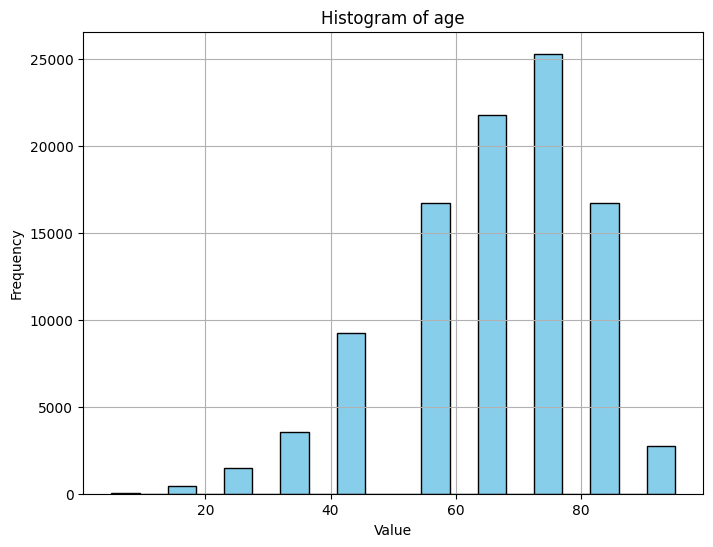

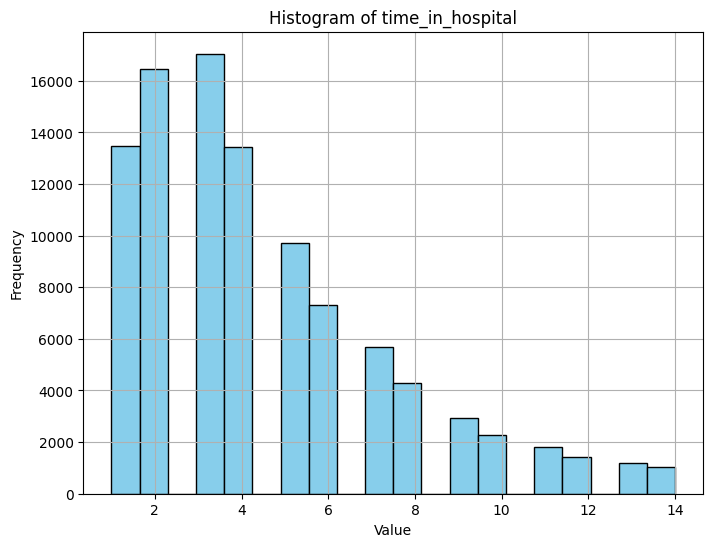

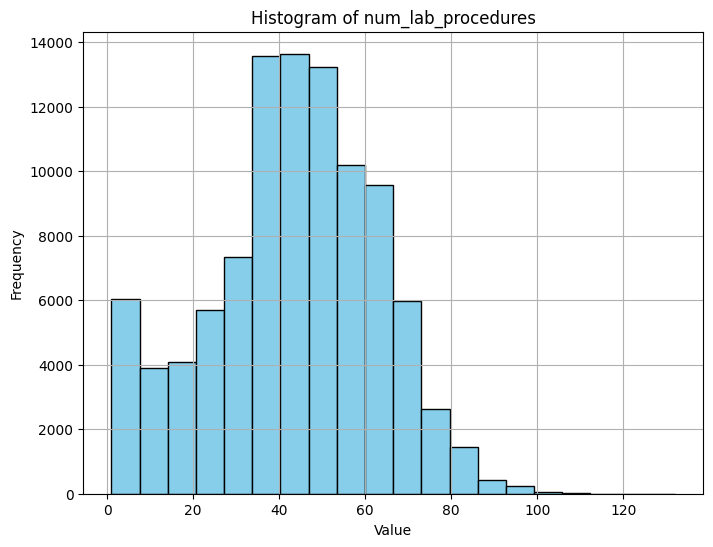

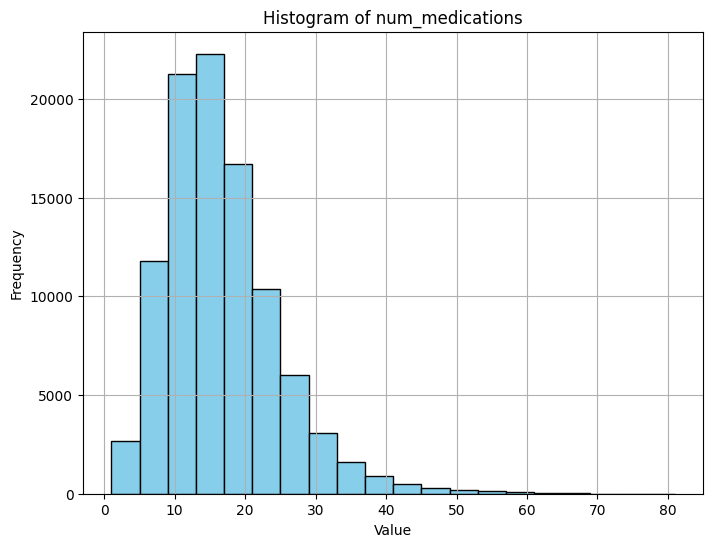

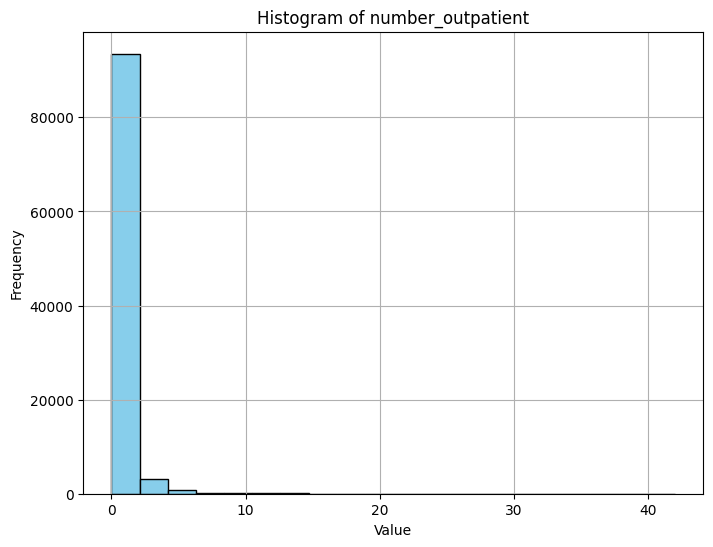

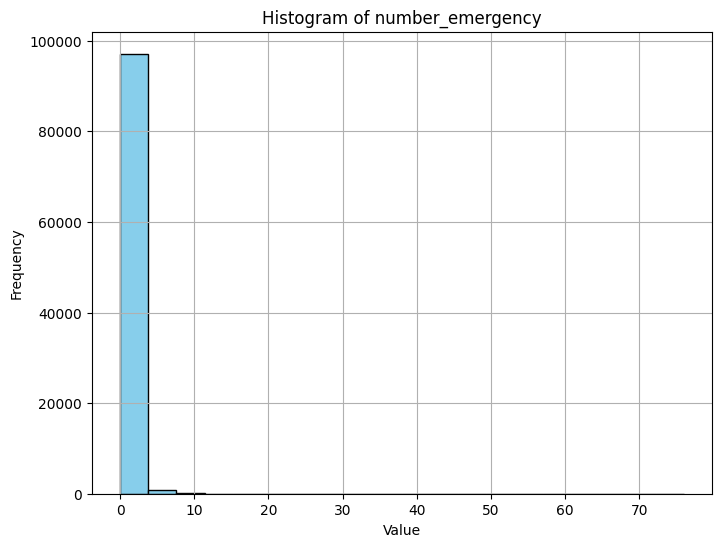

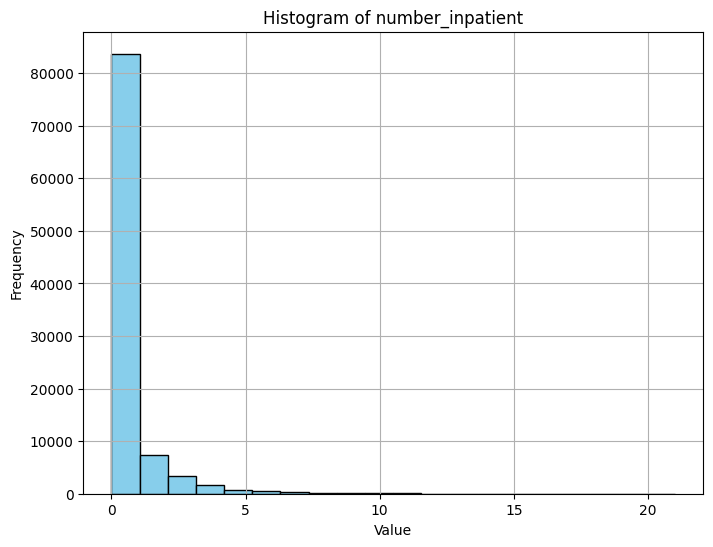

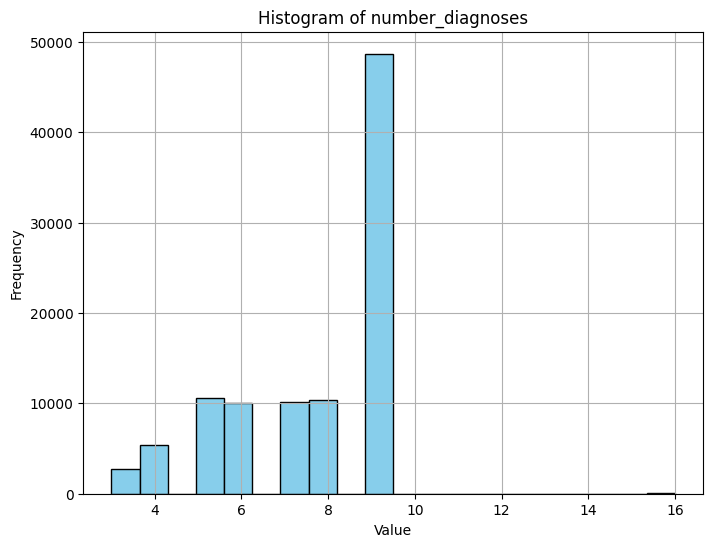

In [24]:
import matplotlib.pyplot as plt
data_columns = [
    'age',
    'time_in_hospital',
    'num_lab_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses'
]
# Plot histograms for each column separately
for column in data_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(dataset[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [25]:
# Define the columns for which you want to remove outliers using Z-score
columns_with_zscore = ['num_lab_procedures','number_diagnoses']

# Remove outliers from the specified columns using Z-score
for column in columns_with_zscore:
    # Calculate Z-Score Method outliers
    z_scores = np.abs((dataset[column] - dataset[column].mean()) / dataset[column].std())
    outliers_zscore = (z_scores > 3)
    
    # Remove outliers from the specific column
    dataset = dataset[~outliers_zscore]

In [26]:
# Define the columns for which you want to apply IQR
columns_with_iqr = ['num_medications','time_in_hospital','number_inpatient']
# Remove outliers from the specified columns using IQR
for column in columns_with_iqr:
    # Calculate the quantiles
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers by filtering the DataFrame
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

In [27]:
dataset.shape

(86359, 26)

In [28]:
dataset.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
readmitted                  0
dtype: int64

In [29]:
# Specify the file path where you want to save the cleaned data
output_file_path = "updated_diabetic_data.csv"

# Save the cleaned data to a new CSV file
dataset.to_csv(output_file_path, index=False)

print("Cleaned data has been saved to:", output_file_path)

Cleaned data has been saved to: updated_diabetic_data.csv
